In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Temp Plot(2).csv')

In [3]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
0,10/3/2016,0.00,25.567,26.171,75.9,24.388889
1,10/4/2016,0.00,25.713,26.100,78.6,25.888889
2,10/5/2016,0.06,25.946,26.100,82.6,28.111111
3,10/6/2016,0.39,26.446,26.158,82.8,28.222222
4,10/7/2016,0.00,26.663,26.300,72.3,22.388889


In [4]:
data.isna().sum()

Date                   0
Rainfall(inch)         1
Temperature(0.9m)     12
Temperature(1.8m)    353
Air Temp F            11
Air Temp C            11
dtype: int64

In [5]:
#Handling Missing values
# Mean imputation for missing values
data['Rainfall(inch)'].fillna(data['Rainfall(inch)'].mean(), inplace=True)
data['Temperature(0.9m)'].fillna(data['Temperature(0.9m)'].mean(), inplace=True)
data['Temperature(1.8m)'].fillna(data['Temperature(1.8m)'].mean(), inplace=True)
data['Air Temp F'].fillna(data['Air Temp F'].mean(), inplace=True)
data['Air Temp C'].fillna(data['Air Temp C'].mean(), inplace=True)

In [6]:
data.isna().sum()

Date                 0
Rainfall(inch)       0
Temperature(0.9m)    0
Temperature(1.8m)    0
Air Temp F           0
Air Temp C           0
dtype: int64

In [7]:
#creating day of year column

data['Date'] = pd.to_datetime(data['Date'])
data['day_of_year'] = data['Date'].dt.dayofyear

In [8]:
#Droping irrelevant features
data.drop(columns=['Date','Air Temp F'],axis=1,inplace=True)

In [9]:
data.describe()

,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp C,day_of_year
count,1165.000000,1165.00000,1165.000000,1165.000000,1165.000000
mean,0.071375,20.59214,21.291655,20.302811,190.738197
std,0.252654,5.86034,4.164601,8.746264,106.805718
min,0.000000,8.50400,11.200000,-4.888889,1.000000
25%,0.000000,15.53300,19.200000,13.777778,98.000000
50%,0.000000,20.33700,21.291655,21.222222,195.000000
75%,0.000000,25.97500,24.283000,27.888889,288.000000
max,4.140000,30.80800,29.700000,36.111111,366.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rainfall(inch)     1165 non-null   float64
 1   Temperature(0.9m)  1165 non-null   float64
 2   Temperature(1.8m)  1165 non-null   float64
 3   Air Temp C         1165 non-null   float64
 4   day_of_year        1165 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 41.1 KB


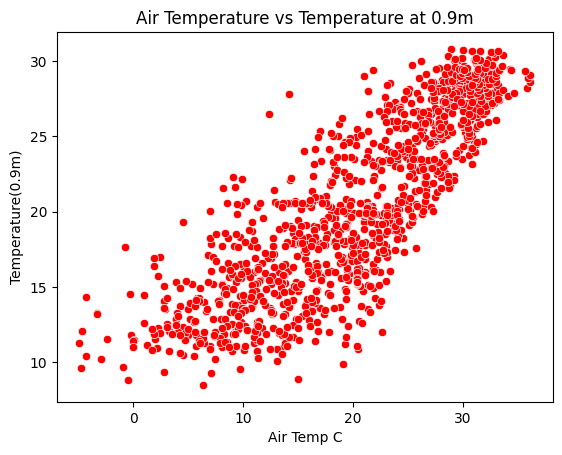

In [11]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air Temp C'], y=data['Temperature(0.9m)'],color='r')
plt.title('Air Temperature vs Temperature at 0.9m')
plt.show()

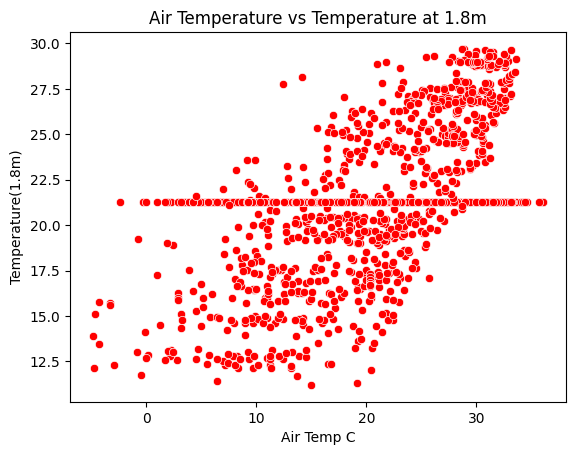

In [12]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air Temp C'], y=data['Temperature(1.8m)'],color='r')
plt.title('Air Temperature vs Temperature at 1.8m')
plt.show()

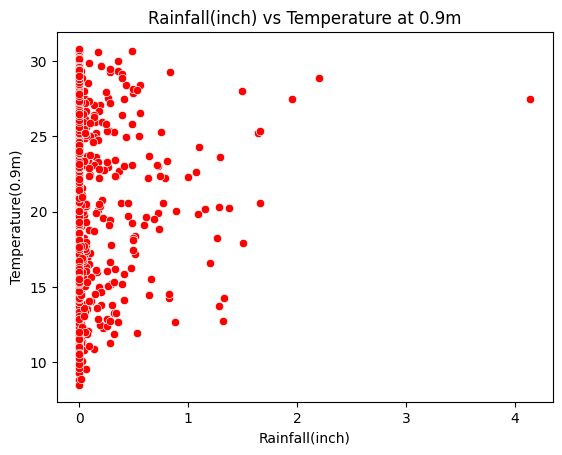

In [13]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Rainfall(inch)'], y=data['Temperature(0.9m)'],color='r')
plt.title('Rainfall(inch) vs Temperature at 0.9m')
plt.show()

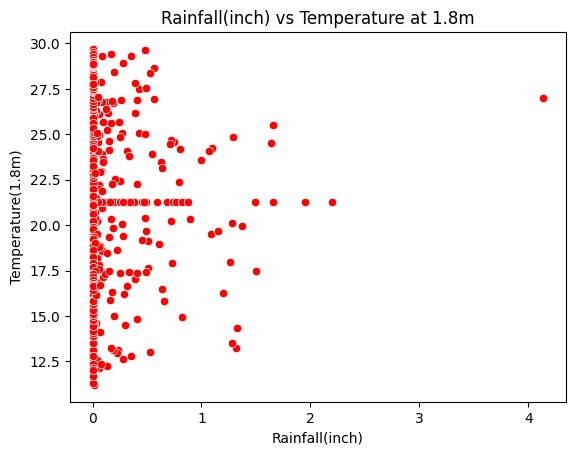

In [14]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Rainfall(inch)'], y=data['Temperature(1.8m)'],color='r')
plt.title('Rainfall(inch) vs Temperature at 1.8m')
plt.show()

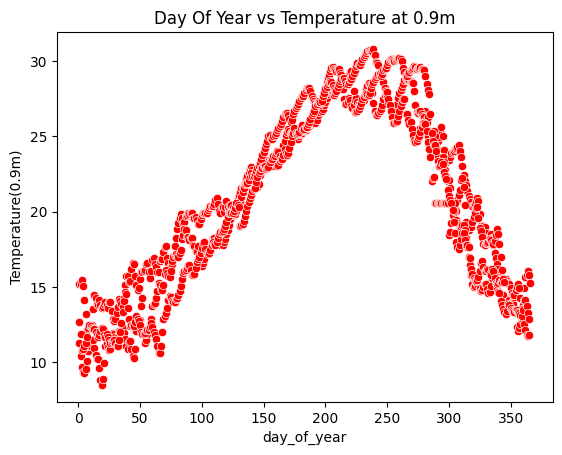

In [16]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['Temperature(0.9m)'],color='r')
plt.title('Day Of Year vs Temperature at 0.9m')
plt.show()

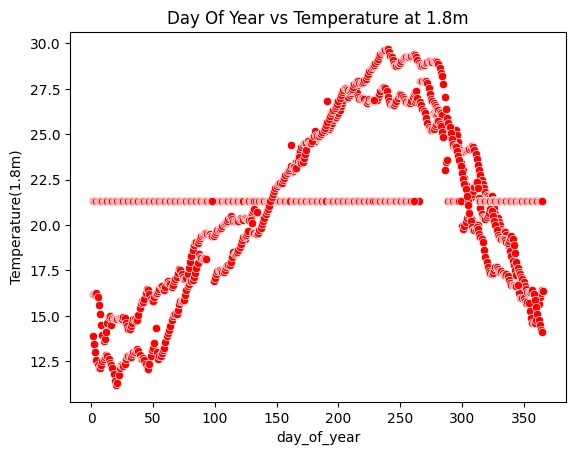

In [17]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['Temperature(1.8m)'],color='r')
plt.title('Day Of Year vs Temperature at 1.8m')
plt.show()

<Axes: >

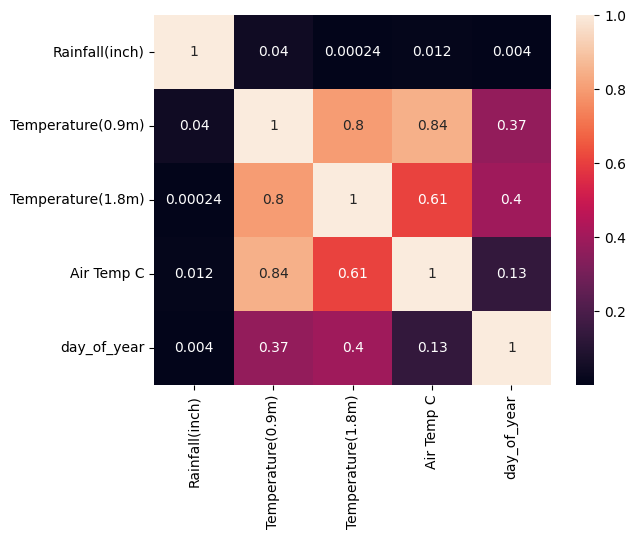

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [20]:
cols=['Rainfall(inch)','Temperature(0.9m)','Temperature(1.8m)','Air Temp C','day_of_year']
data = remove_outliers(data, cols)

In [21]:
data.shape

(906, 5)

In [22]:
X = data[['Air Temp C', 'Rainfall(inch)', 'day_of_year']]
y = data[['Temperature(0.9m)', 'Temperature(1.8m)']]

In [23]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
4,22.388889,0.0,281
5,18.666667,0.0,282
6,18.611111,0.0,283


In [24]:
y.head()

,Temperature(0.9m),Temperature(1.8m)
0,25.567,26.171
1,25.713,26.100
4,26.663,26.300
5,25.850,26.258
6,25.046,25.929


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X.shape,X_train.shape,X_test.shape

((906, 3), (724, 3), (182, 3))

In [27]:
#Starndardization (Scaling the data)

# from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[0.35501355, 0.        , 0.03296703],
       [0.7804878 , 0.        , 0.79395604],
       [0.24932249, 0.        , 0.90384615],
       ...,
       [0.84823848, 0.        , 0.75274725],
       [0.68292683, 0.        , 0.26098901],
       [0.33739837, 0.        , 0.09340659]])

In [29]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np

In [30]:
def evaluate_model(y_true, y_pred):
    """Calculate evaluation metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [31]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    # "Support Vector Regressor": SVR(kernel='linear')
}

In [32]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """Train and evaluate models, and identify the best model based on R² score."""
    results = {}
    best_model_name = None
    best_r2_score = -float('inf')  # Initialize to a very low value

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        try:
            model.fit(X_train, y_train)  # Train the model

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Evaluate Train and Test dataset
            model_train_metrics = evaluate_model(y_train, y_train_pred)
            model_test_metrics = evaluate_model(y_test, y_test_pred)

            # Store results
            results[model_name] = {
                "train_metrics": model_train_metrics,
                "test_metrics": model_test_metrics
            }

            # Print results
            print(f'{model_name} Performance:')
            print('- Training set:')
            print(f"  - RMSE: {model_train_metrics[1]:.4f}, MAE: {model_train_metrics[0]:.4f}, R2: {model_train_metrics[2]:.4f}")
            print('- Test set:')
            print(f"  - RMSE: {model_test_metrics[1]:.4f}, MAE: {model_test_metrics[0]:.4f}, R2: {model_test_metrics[2]:.4f}")
            print('=' * 30)

            # Check for the best model based on the R² score of the test set
            if model_test_metrics[2] > best_r2_score:
                best_r2_score = model_test_metrics[2]
                best_model_name = model_name

        except Exception as e:
            print(f"Error training {model_name}: {e}")

    # Set the best model variable
    best_model = models[best_model_name] if best_model_name else None

    print(f"The best model is: {best_model_name} with an R² score of {best_r2_score:.4f}")
    
    return results, best_model

# Call the function
results, best_model = train_and_evaluate(models, X_train, y_train, X_test, y_test)


Training Linear Regression...
Linear Regression Performance:
- Training set:
  - RMSE: 2.8276, MAE: 2.2957, R2: 0.6515
- Test set:
  - RMSE: 3.0553, MAE: 2.4713, R2: 0.5688
Training Decision Tree Regressor...
Decision Tree Regressor Performance:
- Training set:
  - RMSE: 0.0737, MAE: 0.0055, R2: 0.9998
- Test set:
  - RMSE: 2.4586, MAE: 1.4882, R2: 0.6741
Training Random Forest Regressor...
Random Forest Regressor Performance:
- Training set:
  - RMSE: 0.7115, MAE: 0.4878, R2: 0.9750
- Test set:
  - RMSE: 2.0484, MAE: 1.4025, R2: 0.7758
Training XGBRegressor...
XGBRegressor Performance:
- Training set:
  - RMSE: 0.3339, MAE: 0.2245, R2: 0.9947
- Test set:
  - RMSE: 2.2945, MAE: 1.5552, R2: 0.7206
The best model is: Random Forest Regressor with an R² score of 0.7758


Text(0, 0.5, 'Predicted Values')

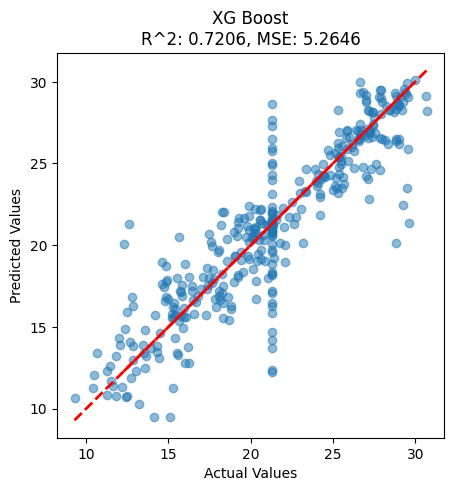

In [54]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"XG Boost\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

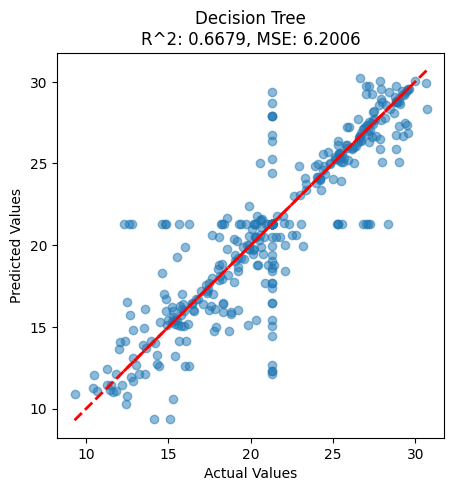

In [50]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Decision Tree\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

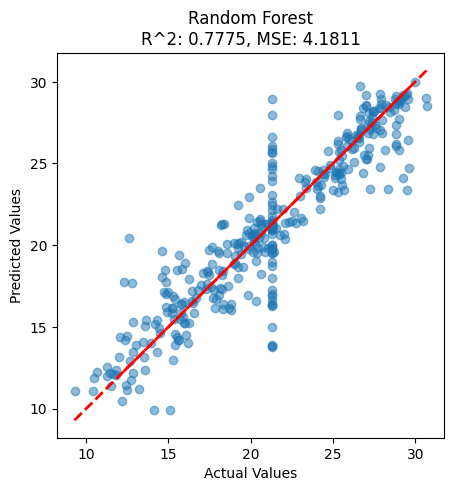

In [52]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Random Forest\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

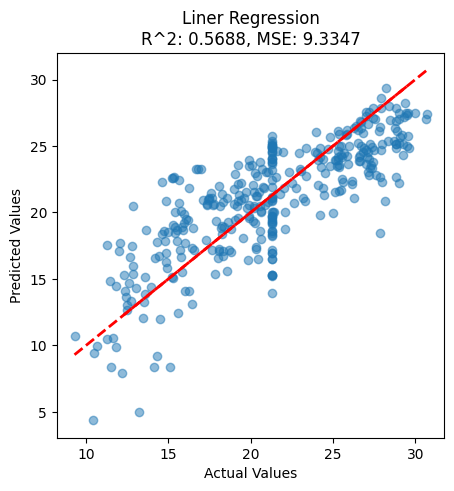

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Liner Regression\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [33]:
best_model

RandomForestRegressor()

In [34]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
4,22.388889,0.0,281
5,18.666667,0.0,282
6,18.611111,0.0,283


In [35]:
# Making predictions for a new sample
#inputs order - AirTemp C, Solar radiation, Precipitation, day_of_year

new_data = np.array([[24.388889,0.0,277]])  # Example values
new_data_scaled = scaler.transform(new_data)
predicted_values = best_model.predict(new_data)
predicted_values

array([[25.24974   , 24.20291172]])

### ANN Implementation

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [37]:

input_features = 3
output_features = 2

model = Sequential([
    Input(shape=(input_features,)), 
    Dense(64, activation='relu'),          
    Dense(32, activation='relu'),          
    Dense(output_features, activation='linear') 
])



In [38]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [39]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,402 (9.38 KB)

 Trainable params: 2,402 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:

model.fit(X_train, y_train, epochs=70, batch_size=1, verbose=1)

Epoch 1/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 224.8528 - mae: 12.1191
Epoch 2/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.9428 - mae: 2.5205
Epoch 3/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0244 - mae: 2.3795
Epoch 4/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7195 - mae: 2.1557
Epoch 5/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6016 - mae: 1.9902
Epoch 6/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1989 - mae: 2.1005
Epoch 7/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6861 - mae: 1.9785
Epoch 8/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3451 - mae: 1.9264
Epoch 9/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.6793 - mae: 1.8572
Epoch 10/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2597 - mae: 1.7623
Epoch 11/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1846 - mae: 1.9177
Epoch 12/70
724/724 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.0378 - mae: 1.8569
Epoch 13/70
724/724 ━━

In [41]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Test Loss: 3.9955973625183105, Test MAE: 1.5389223098754883


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


Text(0, 0.5, 'Predicted Values')

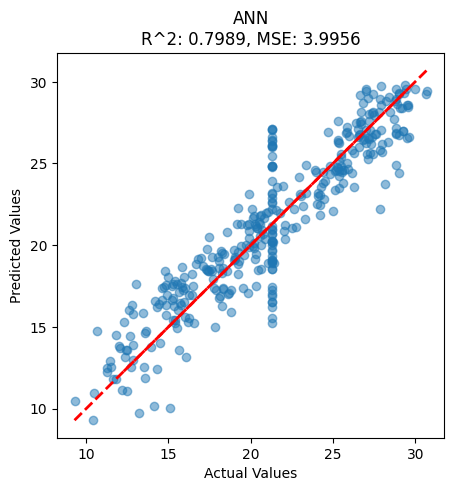

In [55]:
y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [42]:
y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.savefig('ANN_comparison.png')
plt.close()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [43]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
4,22.388889,0.0,281
5,18.666667,0.0,282
6,18.611111,0.0,283


In [44]:
def expand_intermediate_equation(model):
    input_vars = ['Air Temp', 'Rainfall', 'day_of_year']  # Air Temp, Rainfall, day_of_year
    equation = input_vars
    
    final_equation = ""

    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        output_vars = []

        layer_equation = []
        for j in range(weights.shape[1]):
            terms = [f"({weights[k, j]:.3f} * {equation[k]})" for k in range(len(equation))]
            layer_equation.append(f"({' + '.join(terms)} + {biases[j]:.3f})")

        if layer.activation.__name__ == 'relu':
            layer_equation = [f"ReLU({eq})" for eq in layer_equation]
        equation = layer_equation
        if i == len(model.layers) - 1:
            final_equation = equation[0]

    print(f"Final Expanded Equation: \nOutput = {final_equation}")

expand_intermediate_equation(model)


Final Expanded Equation: 
Output = ((-0.022 * ReLU(((0.125 * ReLU(((-0.171 * Air Temp) + (0.039 * Rainfall) + (-0.135 * day_of_year) + 0.000))) + (-0.236 * ReLU(((0.074 * Air Temp) + (-0.141 * Rainfall) + (0.067 * day_of_year) + 0.438))) + (0.085 * ReLU(((0.612 * Air Temp) + (0.268 * Rainfall) + (-0.422 * day_of_year) + 0.019))) + (-0.025 * ReLU(((-0.386 * Air Temp) + (0.172 * Rainfall) + (-0.028 * day_of_year) + 0.439))) + (0.061 * ReLU(((-0.235 * Air Temp) + (-0.027 * Rainfall) + (-0.008 * day_of_year) + 0.000))) + (-0.186 * ReLU(((-0.144 * Air Temp) + (-0.082 * Rainfall) + (0.005 * day_of_year) + 0.000))) + (-0.242 * ReLU(((0.084 * Air Temp) + (0.006 * Rainfall) + (0.237 * day_of_year) + 0.411))) + (0.084 * ReLU(((0.208 * Air Temp) + (-0.115 * Rainfall) + (0.115 * day_of_year) + 0.425))) + (-0.048 * ReLU(((0.517 * Air Temp) + (-0.001 * Rainfall) + (-0.885 * day_of_year) + 0.198))) + (0.182 * ReLU(((0.185 * Air Temp) + (0.076 * Rainfall) + (-0.091 * day_of_year) + 0.418))) + (0.004 *

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 3.9956
Mean Absolute Error: 1.5389
R² Score: 0.7989


In [46]:
#inputs order - AirTemp C,radiation, day_of_year

new_data = np.array([[24.388889,0.039,277]])  # Example values
new_data_scaled = scaler.transform(new_data)
predicted_values = best_model.predict(new_data_scaled)
predicted_values

array([[25.73351, 26.29777]])

In [47]:
data.head()

,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp C,day_of_year
0,0.0,25.567,26.171,24.388889,277
1,0.0,25.713,26.100,25.888889,278
4,0.0,26.663,26.300,22.388889,281
5,0.0,25.850,26.258,18.666667,282
6,0.0,25.046,25.929,18.611111,283
